Import needed library for learning model

In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Build dataframe for training set

In [9]:
train = pd.read_csv('all_car_adverts.csv'  )
train.head()

,Customer_id,make,model,variant,car_price,car_badges,car_title,car_sub_title,car_attention_grabber,car_specs,...,num_owner,ulez,full_service,part_service,part_warranty,full_dealership,first_year_road_tax,brand_new,finance_available,discounted
0,0,AC,Cobra,NaN,89995,NaN,AC Cobra,4.9 MK IV CRS 2dr,GENUINE AC COBRA CRS 522 BHP,"2001 (X reg), Convertible, 14,400 miles, 4.9L,...",...,5.0,0,0,0,0,0,0,0,0,0
1,1,AC,Cobra,NaN,92500,'',AC Cobra,378 - MkIV,PHYSICAL CAR!,"2019 (T reg), Convertible, 650 miles, Manual, ...",...,NaN,0,0,0,0,0,0,0,0,0
2,2,AC,Cobra,NaN,109995,'',AC Cobra,MK1V 212 SC. 3.5 V8 350 BHP LOTUS TWIN TURBO. ...,FULL CARBON FIBRE BODY.,"2000 (X reg), Convertible, 21,600 miles, 3.5L,...",...,3.0,0,0,0,0,0,0,0,0,0
3,3,AC,Cobra,NaN,124950,'',AC Cobra,302 MKIV 2dr,ABSOLUTELY STUNNING,"1989 (F reg), Convertible, 2,750 miles, Manual...",...,NaN,0,0,0,0,0,0,0,0,0
4,4,AC,Cobra,NaN,124950,'',AC Cobra,302 MKIV With Factory Lightweight Engine 5.0 2dr,'STAGE 3' SVO ENGINE,"1989 (E reg), Convertible, 15,142 miles, 5.0L,...",...,NaN,0,0,0,0,0,0,0,0,0


# Data Analysis and Preprocessing

## Check collumns and shapes in dataframe

In [10]:
train.columns

Index(['Customer_id', 'make', 'model', 'variant', 'car_price', 'car_badges',
       'car_title', 'car_sub_title', 'car_attention_grabber', 'car_specs',
       'car_seller', 'car_seller_rating', 'car_seller_location', 'year', 'reg',
       'body_type', 'miles', 'engine_vol', 'engine_size', 'engine_size_unit',
       'transmission', 'feul_type', 'num_owner', 'ulez', 'full_service',
       'part_service', 'part_warranty', 'full_dealership',
       'first_year_road_tax', 'brand_new', 'finance_available', 'discounted'],
      dtype='object')

In [13]:
print("There are " + str(train.shape[0]) + " rows and " + str(train.shape[1]) + " columns")

There are 818456 rows and 32 columns


## Describe some basic statistical values

In [16]:
train.describe()

,Customer_id,car_price,car_seller_rating,miles,engine_vol,engine_size,num_owner,ulez,full_service,part_service,part_warranty,full_dealership,first_year_road_tax,brand_new,finance_available,discounted
count,818456.000000,8.184560e+05,644191.000000,763703.000000,803010.000000,814247.000000,442596.000000,818456.000000,818456.000000,818456.000000,818456.000000,818456.000000,818456.000000,818456.000000,818456.000000,818456.000000
mean,409227.500000,2.011859e+04,4.649465,48735.854328,1.860284,170.134123,2.097290,0.815449,0.108105,0.013059,0.063693,0.035079,0.063693,0.066233,0.716983,0.045162
std,236268.040297,2.224110e+04,0.433626,36520.141907,0.752763,92.141443,1.265622,0.387933,0.310513,0.113526,0.244206,0.183981,0.244206,0.248690,0.450465,0.207659
min,0.000000,3.000000e+02,1.000000,2.000000,0.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,204613.750000,8.990000e+03,4.600000,19441.000000,1.400000,115.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,409227.500000,1.500000e+04,4.700000,40267.000000,1.600000,148.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,613841.250000,2.450000e+04,4.900000,71215.500000,2.000000,190.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,818455.000000,3.199830e+06,5.000000,999999.000000,8.300000,2460.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Describe summary of data frame 

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818456 entries, 0 to 818455
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer_id            818456 non-null  int64  
 1   make                   818456 non-null  object 
 2   model                  818153 non-null  object 
 3   variant                816207 non-null  object 
 4   car_price              818456 non-null  int64  
 5   car_badges             801459 non-null  object 
 6   car_title              818456 non-null  object 
 7   car_sub_title          817909 non-null  object 
 8   car_attention_grabber  738163 non-null  object 
 9   car_specs              818456 non-null  object 
 10  car_seller             818348 non-null  object 
 11  car_seller_rating      644191 non-null  float64
 12  car_seller_location    816256 non-null  object 
 13  year                   818456 non-null  object 
 14  reg                    747436 non-nu

## Handling outliers

In [28]:
train_outliers=train.select_dtypes(include=['int', 'float'])
train_outliers.head()


,Customer_id,car_price,car_seller_rating,miles,engine_vol,engine_size,num_owner,ulez,full_service,part_service,part_warranty,full_dealership,first_year_road_tax,brand_new,finance_available,discounted
0,0,89995,NaN,14400.0,4.9,225.0,5.0,0,0,0,0,0,0,0,0,0
1,1,92500,5.0,650.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
2,2,109995,4.8,21600.0,3.5,NaN,3.0,0,0,0,0,0,0,0,0,0
3,3,124950,5.0,2750.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
4,4,124950,5.0,15142.0,5.0,NaN,NaN,0,0,0,0,0,0,0,0,0


In [27]:
for col in train_outliers:
    q1 = train_outliers[col].quantile(0.25)
    q3 = train_outliers[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    outliers = train_outliers[(train_outliers[col] < range_low) | (train_outliers[col] > range_high)]
    print("NUmber of outliers in " + str(col) + " is : " + str(len(outliers)))
    

NUmber of outliers in Customer_id is : 0
NUmber of outliers in car_price is : 50585
NUmber of outliers in car_seller_rating is : 50793
NUmber of outliers in miles is : 9350
NUmber of outliers in engine_vol is : 96139
NUmber of outliers in engine_size is : 66498
NUmber of outliers in num_owner is : 3856
NUmber of outliers in ulez is : 151047
NUmber of outliers in full_service is : 88479
NUmber of outliers in part_service is : 10688
NUmber of outliers in part_warranty is : 52130
NUmber of outliers in full_dealership is : 28711
NUmber of outliers in first_year_road_tax is : 52130
NUmber of outliers in brand_new is : 54209
NUmber of outliers in finance_available is : 0
NUmber of outliers in discounted is : 36963


Display the distribution of values in each column of a dataset and highlight outliers by boxplot chart

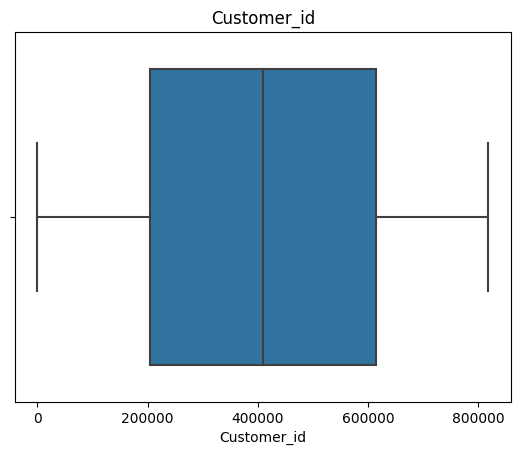

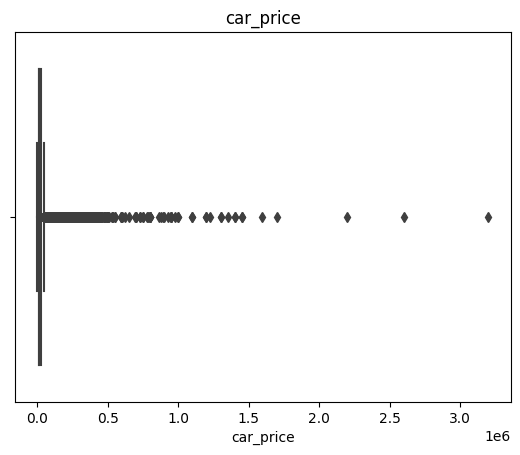

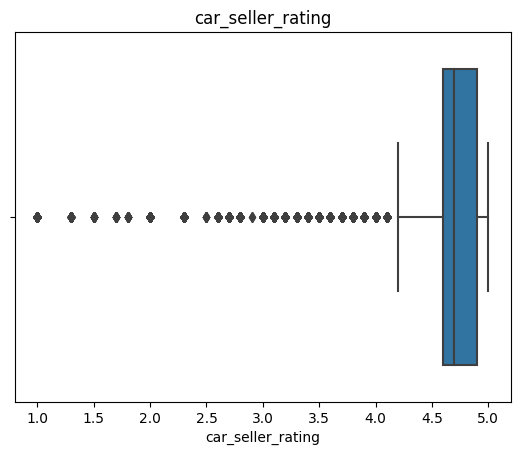

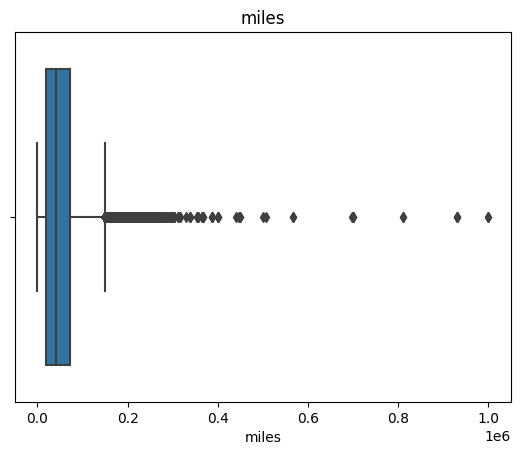

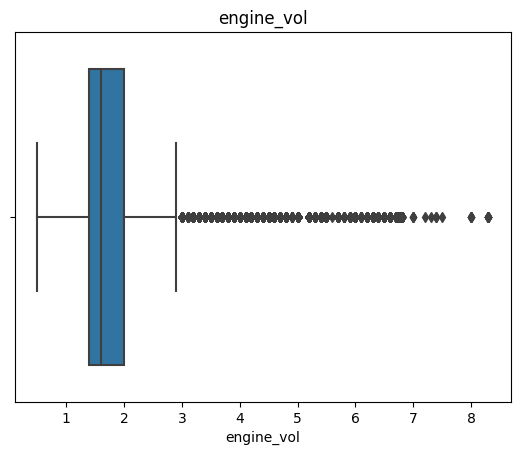

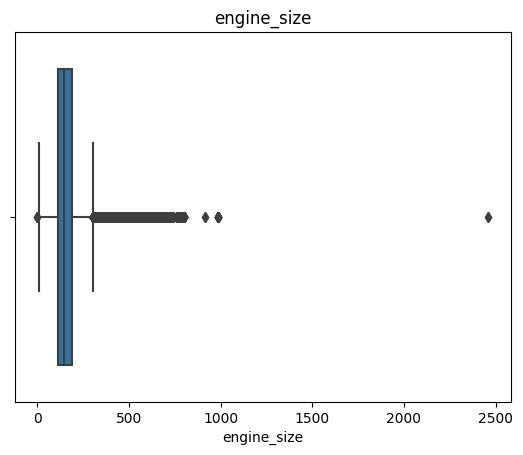

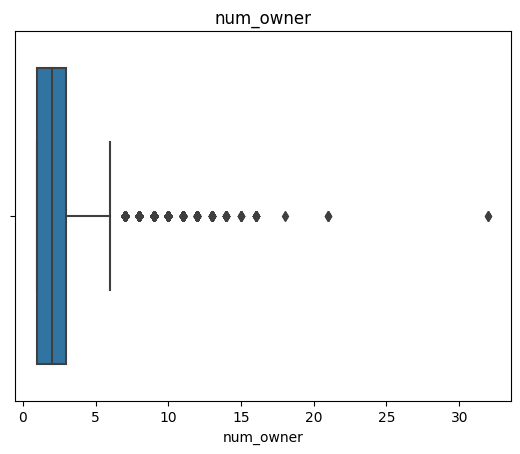

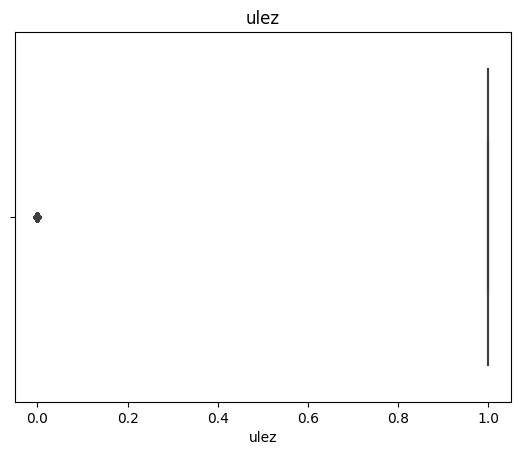

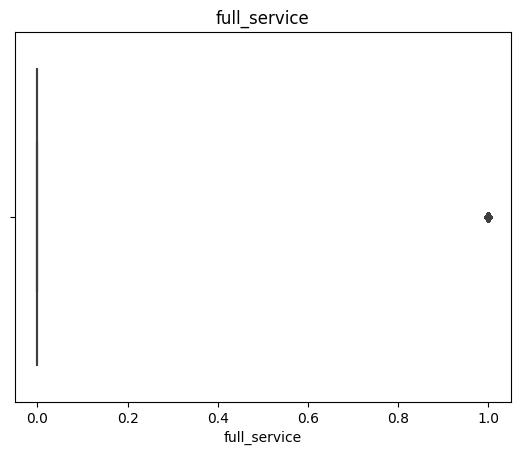

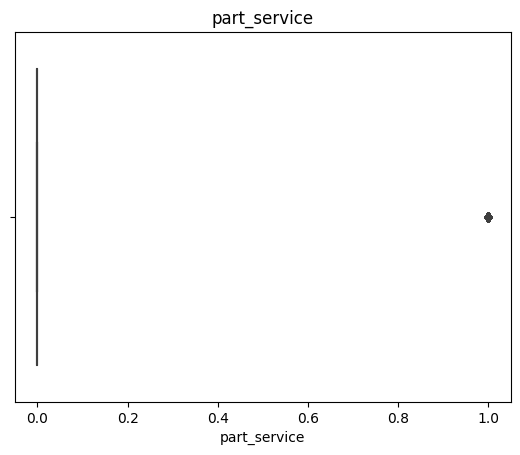

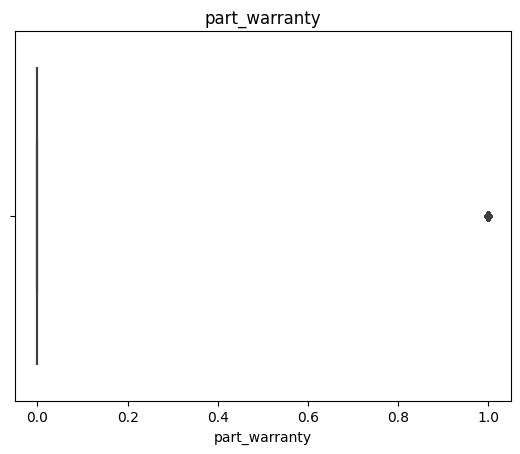

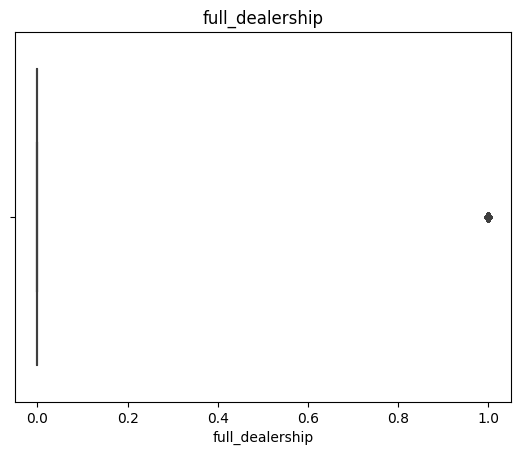

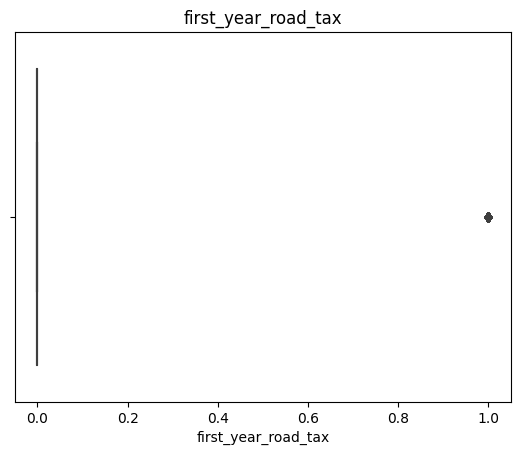

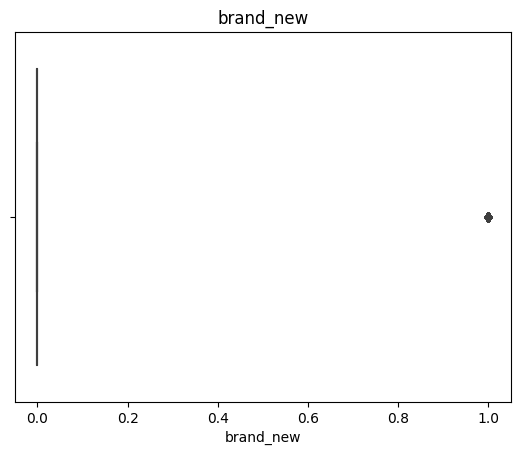

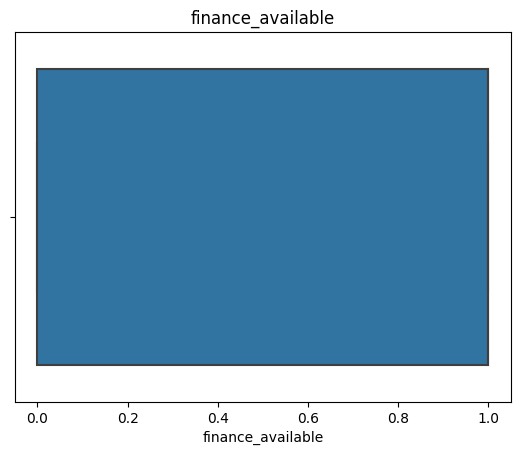

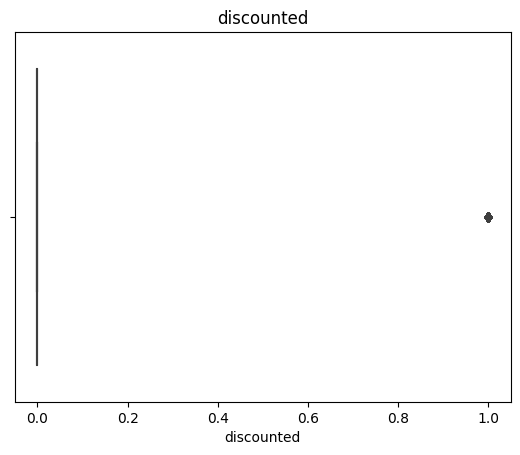

In [30]:
for col in train_outliers:
    
    sns.boxplot(x=train_outliers[col], whis=1.5)
    plt.title(col)
    plt.show()

## Checking Data Imbalance

In [31]:
train_data_imbalance=train.select_dtypes(include=['object'])
train_data_imbalance.head()


,make,model,variant,car_badges,car_title,car_sub_title,car_attention_grabber,car_specs,car_seller,car_seller_location,year,reg,body_type,engine_size_unit,transmission,feul_type
0,AC,Cobra,NaN,NaN,AC Cobra,4.9 MK IV CRS 2dr,GENUINE AC COBRA CRS 522 BHP,"2001 (X reg), Convertible, 14,400 miles, 4.9L,...",Private seller,watford,2001,X reg,convertible,bhp,manual,petrol
1,AC,Cobra,NaN,'',AC Cobra,378 - MkIV,PHYSICAL CAR!,"2019 (T reg), Convertible, 650 miles, Manual, ...",Boss Motor Company Limited,chesham,2019,T reg,convertible,NaN,manual,petrol
2,AC,Cobra,NaN,'',AC Cobra,MK1V 212 SC. 3.5 V8 350 BHP LOTUS TWIN TURBO. ...,FULL CARBON FIBRE BODY.,"2000 (X reg), Convertible, 21,600 miles, 3.5L,...",PREMIER GT LIMITED,pulborough,2000,X reg,convertible,NaN,manual,petrol
3,AC,Cobra,NaN,'',AC Cobra,302 MKIV 2dr,ABSOLUTELY STUNNING,"1989 (F reg), Convertible, 2,750 miles, Manual...",TOP 555 LIMITED,oakham,1989,F reg,convertible,NaN,manual,petrol
4,AC,Cobra,NaN,'',AC Cobra,302 MKIV With Factory Lightweight Engine 5.0 2dr,'STAGE 3' SVO ENGINE,"1989 (E reg), Convertible, 15,142 miles, 5.0L,...",TOP 555 LIMITED,oakham,1989,E reg,convertible,NaN,manual,petrol
